In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv(r'C:\Users\DELL_Tech\Downloads\Covid_19_Clean_Complete.csv')

In [45]:
df=pd.DataFrame(data)


In [46]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
Active=confirmed-death-recovered

In [47]:
df['Date'].value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [48]:
df['Date'].max()#27 July 2020

'2020-07-27'

In [49]:
df['Date'].min()#22 January 2020

'2020-01-22'

In [50]:
top=df[df['Date']=='2020-07-27']
top

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [51]:
top.duplicated().sum()

0

In [52]:
#group all rows on country

In [53]:
top.groupby(by='Country/Region')[['Date','Confirmed','Deaths','Recovered','Active']].sum()

,Date,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,
Afghanistan,2020-07-27,36263,1269,25198,9796
Albania,2020-07-27,4880,144,2745,1991
Algeria,2020-07-27,27973,1163,18837,7973
Andorra,2020-07-27,907,52,803,52
Angola,2020-07-27,950,41,242,667
...,...,...,...,...,...
West Bank and Gaza,2020-07-27,10621,78,3752,6791
Western Sahara,2020-07-27,10,1,8,1
Yemen,2020-07-27,1691,483,833,375


In [ ]:
#23 january 2020 total confirmed cases of all country

In [60]:
confirmed=df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed[confirmed['Date']=='2020-01-23']

,Date,Confirmed
1,2020-01-23,654


In [61]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [59]:
df[df['Date']=='2020-01-23']['Confirmed'].sum()

654

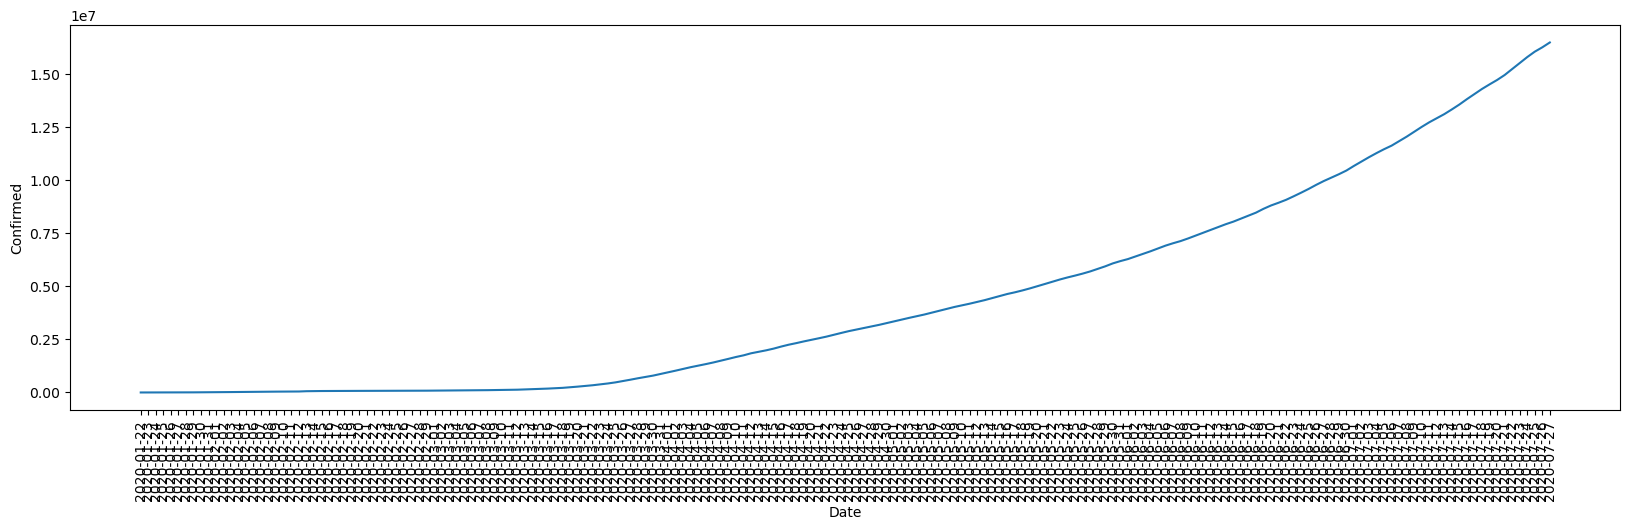

In [65]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed,x='Date',y='Confirmed')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Top 10 countries with most recovered cases

In [80]:
top10=df.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending=False).reset_index()
top10.head(10)

,Country/Region,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


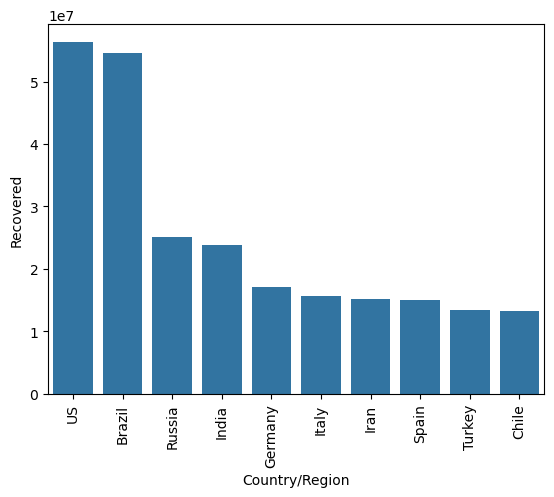

In [79]:
sns.barplot(data=top10.head(10),x='Country/Region',y='Recovered')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#top 10 countries with most deaths

In [97]:
top10_deaths=df.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending=False).reset_index()
top10_deaths.head(10)

,Country/Region,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


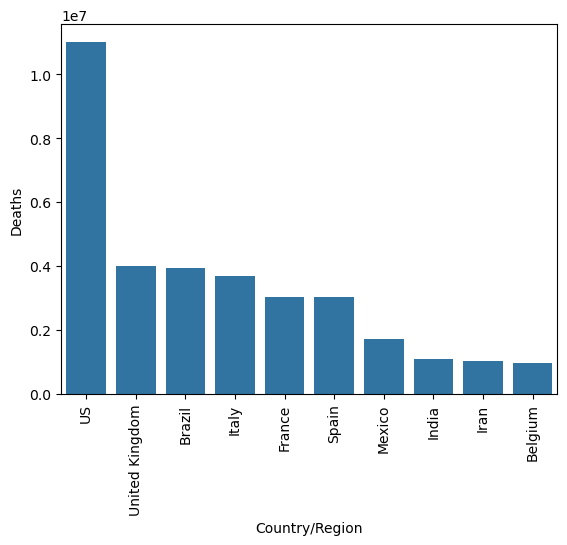

In [96]:
sns.barplot(data=top10_deaths.head(10),x='Country/Region',y='Deaths')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#top10 countries with most active cases

In [101]:
top10_active=df.groupby(by='Country/Region')['Active'].sum().sort_values(ascending=False).reset_index()
top10_active.head(10)

,Country/Region,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


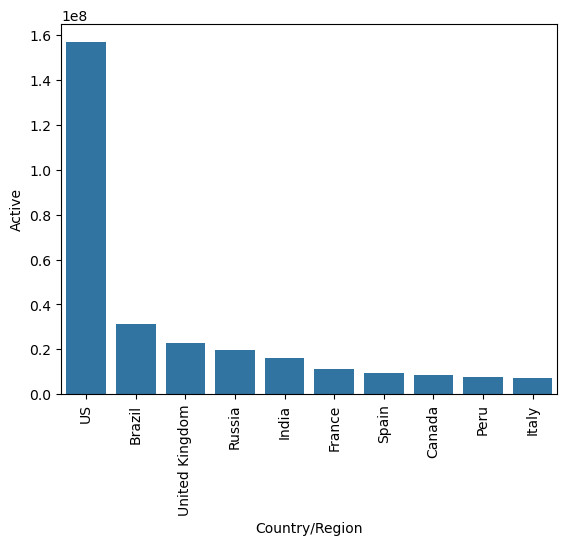

In [102]:
sns.barplot(data=top10_active.head(10),x='Country/Region',y='Active')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# US, Brazil, India

In [131]:
US=df[df['Country/Region']=='US']
US.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [132]:
US=US.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [133]:
Brazil=df[df['Country/Region']=='Brazil']
Brazil

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
28,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0,0,0,Americas
289,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0,0,0,Americas
550,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0,0,0,Americas
811,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0,0,0,Americas
1072,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
47791,NaN,Brazil,-14.235,-51.9253,2020-07-23,2287475,84082,1620313,583080,Americas
48052,NaN,Brazil,-14.235,-51.9253,2020-07-24,2343366,85238,1693214,564914,Americas
48313,NaN,Brazil,-14.235,-51.9253,2020-07-25,2394513,86449,1785359,522705,Americas
48574,NaN,Brazil,-14.235,-51.9253,2020-07-26,2419091,87004,1812913,519174,Americas


In [134]:
Brazil=Brazil.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
Brazil

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,84082,1620313,583080
184,2020-07-24,2343366,85238,1693214,564914
185,2020-07-25,2394513,86449,1785359,522705
186,2020-07-26,2419091,87004,1812913,519174


In [135]:
India=df[df['Country/Region']=='India']
India

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [136]:
India=India.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


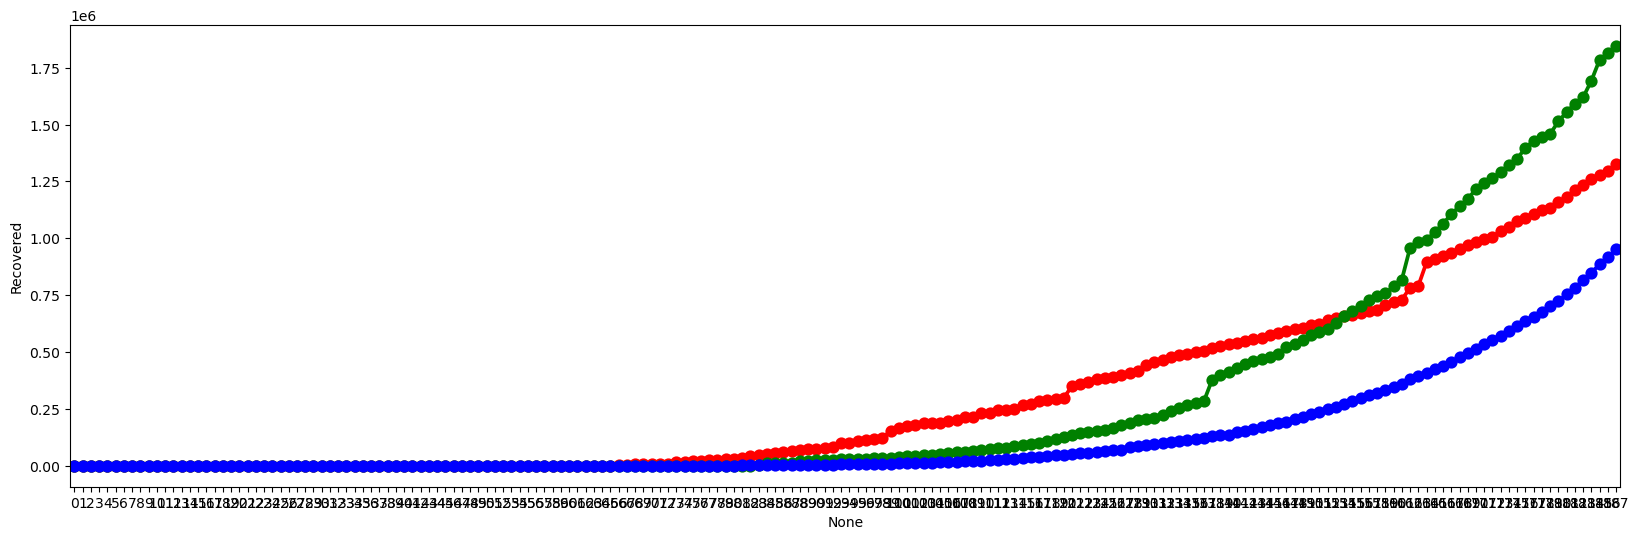

In [142]:
plt.figure(figsize=(20,6))
sns.pointplot(x=US.index,y=US.Recovered,color='Red')
sns.pointplot(x=Brazil.index,y=Brazil.Recovered,color='Green')
sns.pointplot(x=India.index,y=India.Recovered,color='Blue')
plt.show()

In [ ]:
# Model building

In [ ]:
Facebook prophet-2017 by facebook datascience research department
2 columns,1- date, 2- value

In [ ]:
date, confirmed
ds,y

In [ ]:
# y(t)=g(t)+s(t)+h(t)+e(t)
# y(t)-forecast
# g(t)-trends
# s(t)-seasonality
# h(t)-holiday effects
# e(t)-error term

In [144]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [146]:
df['Date']=pd.to_datetime(df['Date'])

In [151]:
confirmed_data=df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed_data

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#confirmed_data=confirmed_data.rename(columns={'Date':'ds','Confirmed':'y'})

In [152]:
confirmed_data.columns=['ds','y']
confirmed_data

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [154]:
#install prophet library
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.4/13.3 MB 2.3 MB/s eta 0:00:06
   - -------------------------------------- 0.7/13.3 MB 2.9 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/13.3 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 5.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.7/13.3 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/13.3 MB 6.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.9/13.3 MB 7.9 MB/s eta 0:00:02
   ------------- -------------------------- 4.4/13.3 MB 8.2 MB/s eta 0:00:02
   ---

In [155]:
#importing prophet model
from prophet import Prophet

In [156]:
model=Prophet()

In [157]:
model.fit(confirmed_data)

12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#forecasting for next 7 periods/7 Days

In [175]:
future=model.make_future_dataframe(15,freq='D',include_history=True)#shift+Tab

In [176]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.269936e+05,8.565549e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.220870e+05,9.377157e+04,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-9.779922e+04,1.184739e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-8.803159e+04,1.142891e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.284318e+04,1.116520e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-08-07,1.838321e+07,1.826129e+07,1.854256e+07,1.830222e+07,1.848018e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.839331e+07
199,2020-08-08,1.858745e+07,1.845472e+07,1.874534e+07,1.849317e+07,1.869914e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.860112e+07
200,2020-08-09,1.879169e+07,1.863339e+07,1.895318e+07,1.868373e+07,1.891793e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,1.879891e+07
201,2020-08-10,1.899593e+07,1.882581e+07,1.918231e+07,1.887078e+07,1.914007e+07,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,0.0,0.0,0.0,1.899379e+07


In [177]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.034240e+04,8.565549e+04,-1.269936e+05
1,2020-01-23,-7.746625e+03,9.377157e+04,-1.220870e+05
2,2020-01-24,6.123967e+03,1.184739e+05,-9.779922e+04
3,2020-01-25,1.237938e+04,1.142891e+05,-8.803159e+04
4,2020-01-26,8.615766e+03,1.116520e+05,-9.284318e+04
...,...,...,...,...
198,2020-08-07,1.839331e+07,1.854256e+07,1.826129e+07
199,2020-08-08,1.860112e+07,1.874534e+07,1.845472e+07
200,2020-08-09,1.879891e+07,1.895318e+07,1.863339e+07
201,2020-08-10,1.899379e+07,1.918231e+07,1.882581e+07


In [178]:
yhat-forecasted value
y_hat_lower,y_hat_upper-uncertanity range around forecasted value

SyntaxError: invalid syntax (1274834362.py, line 1)

C:\Users\DELL_Tech\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\DELL_Tech\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


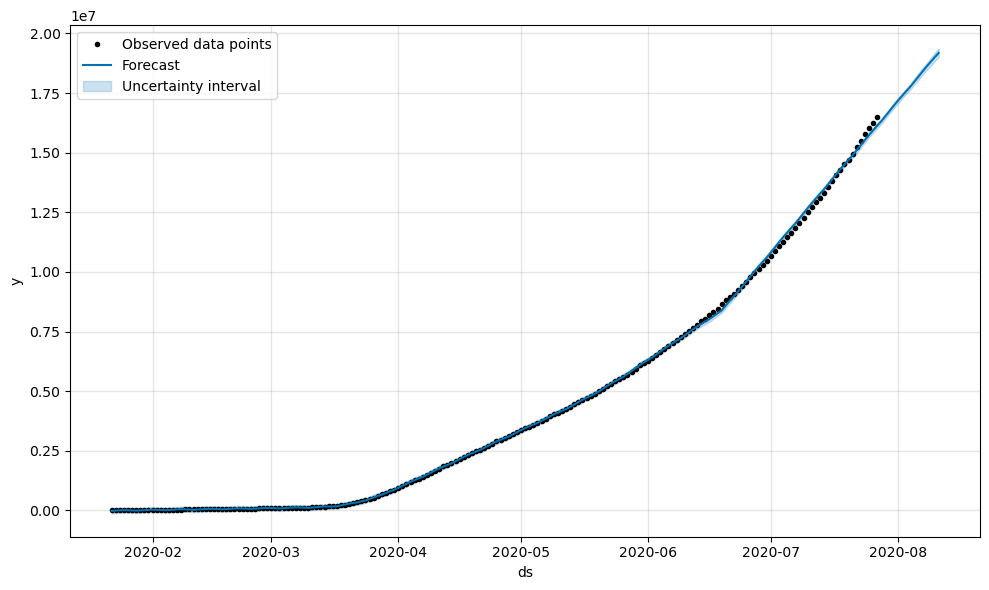

In [179]:
model.plot(forecast,include_legend=True)
plt.show()

In [ ]:
# y(t)-forecast-yhat
# g(t)-trends-trend
# s(t)-seasonality-yearly
# h(t)-holiday effects-weekly
# e(t)-error term-additive terms